In [2]:
!pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313502 sha256=d7073abec59ca5a4fba66fc52ea0f29388d674ff28e32228147db49f4bd57080
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [ ]:
!pip install numpy==1.26.4
import os
os.kill(os.getpid(), 9)  # Restart the runtime (needed in Colab)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [3]:
!wget 'https://www.dropbox.com/scl/fi/eyrwvty94p331ew77p6u9/semantic_tech_real70.csv?rlkey=7qpqq9ut48tln36l1av6qc6ww&st=t0vny14l&dl=1'

--2025-04-03 22:09:47--  https://www.dropbox.com/scl/fi/eyrwvty94p331ew77p6u9/semantic_tech_real70.csv?rlkey=7qpqq9ut48tln36l1av6qc6ww&st=t0vny14l&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0ba9f6bcbf86c0ecddff38ecaf.dl.dropboxusercontent.com/cd/0/inline/CnInuGbDrWuDmODV0CrYPivd7ZDOYXstSYqZLeqOwgFK8dLLhvxyFziGWsMOqrsorlt_-LCjg9nHcVwf8CHkgmyCpzFpqzWjWUkcR0UYzVh7knr8HtLntggxMM_QQWTjNJ24q2DKPkWYIHPBaS7RfSif/file?dl=1# [following]
--2025-04-03 22:09:47--  https://uc0ba9f6bcbf86c0ecddff38ecaf.dl.dropboxusercontent.com/cd/0/inline/CnInuGbDrWuDmODV0CrYPivd7ZDOYXstSYqZLeqOwgFK8dLLhvxyFziGWsMOqrsorlt_-LCjg9nHcVwf8CHkgmyCpzFpqzWjWUkcR0UYzVh7knr8HtLntggxMM_QQWTjNJ24q2DKPkWYIHPBaS7RfSif/file?dl=1
Resolving uc0ba9f6bcbf86c0ecddff38ecaf.dl.dropboxusercontent.com (uc0ba9f6bcbf86c0ecddff38ecaf.dl.dropboxu

better results

fresh start

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/semantic_tech_real70.csv')

# Map to FastText-friendly labels
label_map = {-1: 'NEG', 0: 'NEU', 1: 'POS'}
df['sentiment_label'] = df['sentiment'].map(label_map)

# Build FastText training format
df['fasttext_format'] = '__label__' + df['sentiment_label'] + ' ' + df['review_text'].astype(str)

# Train-test split
train_df, test_df = train_test_split(df['fasttext_format'], test_size=0.2, stratify=df['sentiment_label'], random_state=42)

# Save to .txt
train_df.to_csv('fasttext_train.txt', index=False, header=False)
test_df.to_csv('fasttext_test.txt', index=False, header=False)

# Show a few samples to verify
print("Sample from training file:")
print(train_df.sample(5).values)

print("\nSample from test file:")
print(test_df.sample(5).values)


Sample from training file:
["__label__NEU I like that the case protects the machine from scratches. It fits on the A1181 just right except that the circle does not go exactly around the apple. It is off quite a bit. But I'd rather it protects the machine so I don't care that much and for $13 I can't really complain. Also ordered the matching keyboard/palmrest cover. I like that but it collects so much dust underneath it drives me crazy! It does fit right but the &#34;F&#34; key markings are incorrect, luckily I already know what they do and don't require the cover to tell me."
 "__label__POS It's cheap and it works perfectly.  Not much you can ask from it.  Using in a 2012 Macbook Pro.  ."
 '__label__NEU For the price you really cant complain. It does its job, its a tad dificult to get on the ipad.  The holes dont line up perfectly.  It does keep the ipad safer than uncovered.'
 "__label__NEG I own an iPad4,samsung galaxy 7 tab 2 and very satisfied  and  i also tried acer model with wi

new hyperparameter

In [25]:
text = "This laptop is amazing. Super fast and great battery life!"
labels, probabilities = model.predict(text, k=1)
print(labels, probabilities)


('__label__POS',) [1.00001001]


In [27]:
text = "This laptop is bad.  slow and weak battery life!I don't want it "
labels, probabilities = model.predict(text, k=1)
print(labels, probabilities)


('__label__NEG',) [1.00000906]


In [28]:
text = "I LIke the design but medium performance"
labels, probabilities = model.predict(text, k=1)
print(labels, probabilities)


('__label__NEU',) [1.00001001]


In [32]:
import pandas as pd

# Reload original dataset to get true labels
df = pd.read_csv('/content/semantic_tech_real70.csv')

# Map labels
label_map = {-1: 'NEG', 0: 'NEU', 1: 'POS'}
df['sentiment_label'] = df['sentiment'].map(label_map)

# Stratified split (same as training)
from sklearn.model_selection import train_test_split
_, test_df = train_test_split(df, test_size=0.2, stratify=df['sentiment_label'], random_state=42)


In [33]:
# Load the trained model
import fasttext
model = fasttext.load_model("sentiment_fasttext.bin")

# Predict all samples
y_true = test_df['sentiment_label'].tolist()
y_pred = []
probs = []

for text in test_df['review_text'].astype(str):
    label, prob = model.predict(text, k=1)
    y_pred.append(label[0].replace('__label__', ''))
    probs.append(prob[0])


              precision    recall  f1-score   support

         NEG     0.6750    0.5807    0.6243      3802
         NEU     0.4803    0.4699    0.4751      3407
         POS     0.7444    0.8177    0.7794      6145

    accuracy                         0.6615     13354
   macro avg     0.6333    0.6228    0.6263     13354
weighted avg     0.6573    0.6615    0.6576     13354



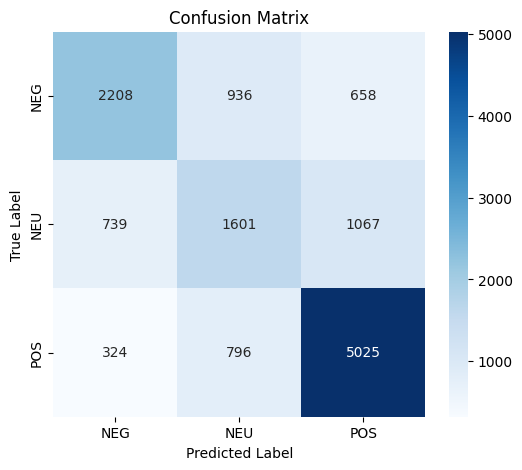

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Report
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["NEG", "NEU", "POS"])

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["NEG", "NEU", "POS"],
            yticklabels=["NEG", "NEU", "POS"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


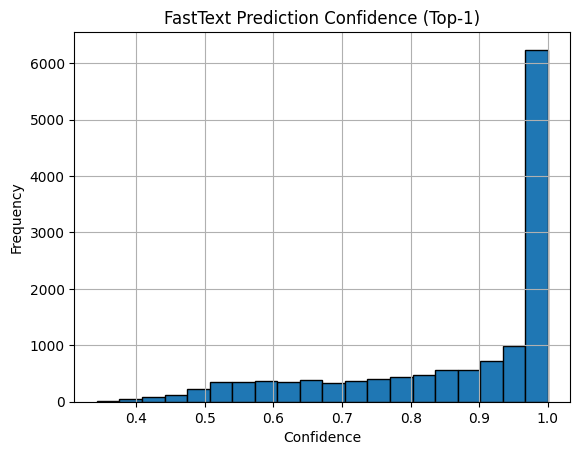

In [35]:
import numpy as np

plt.hist(probs, bins=20, edgecolor='k')
plt.title("FastText Prediction Confidence (Top-1)")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [36]:
import pandas as pd

df = pd.read_csv('/content/semantic_tech_real50.csv')
df['sentiment'].value_counts(normalize=True)


,proportion
sentiment,
1,0.447565
-1,0.295678
0,0.256756


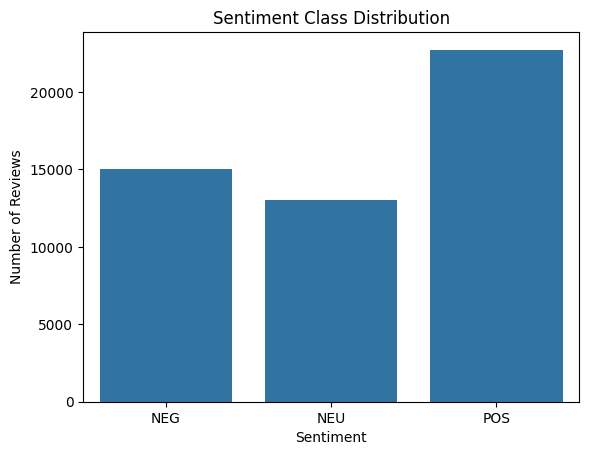

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

label_map = {-1: 'NEG', 0: 'NEU', 1: 'POS'}
df['label'] = df['sentiment'].map(label_map)

sns.countplot(x='label', data=df, order=['NEG', 'NEU', 'POS'])
plt.title("Sentiment Class Distribution")
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment")
plt.show()


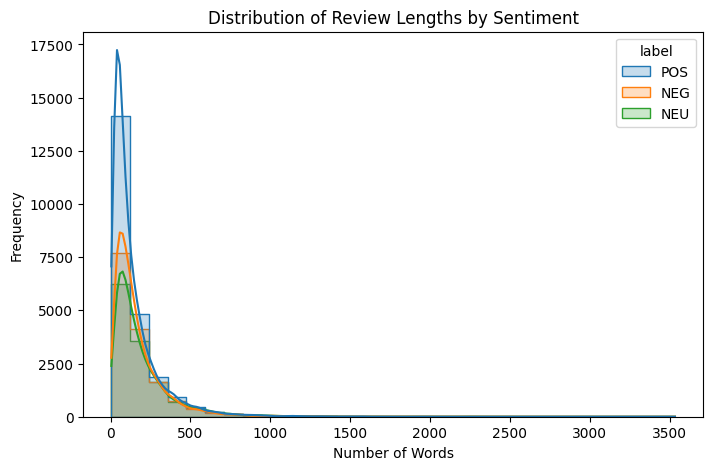

In [38]:
df['text_length'] = df['review_text'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True, element="step")
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


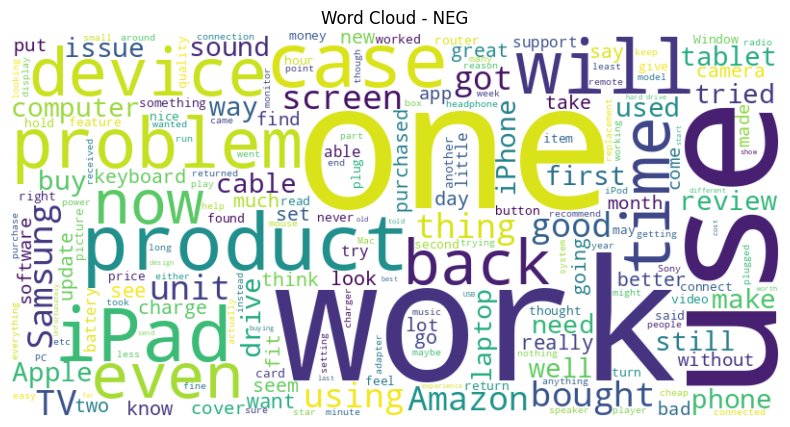

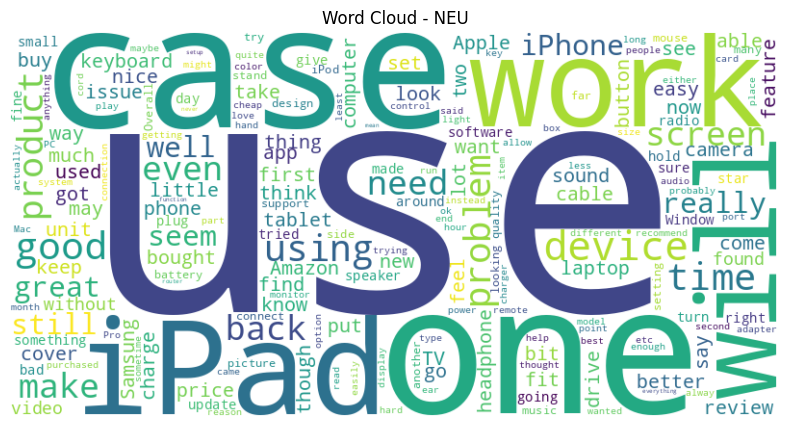

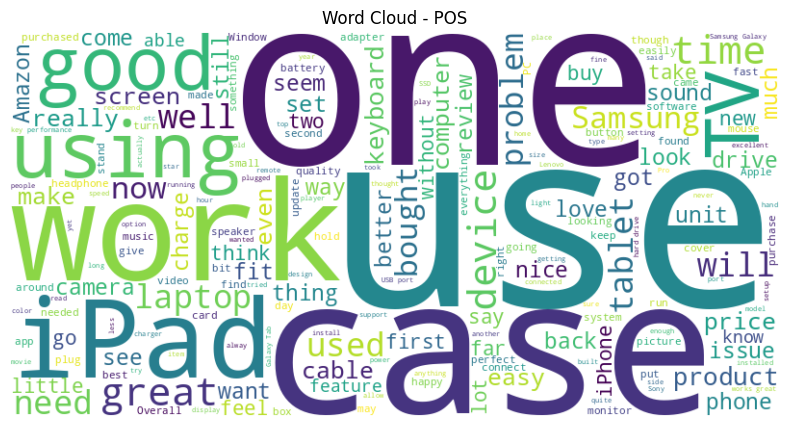

In [39]:
from wordcloud import WordCloud

for sentiment in ['NEG', 'NEU', 'POS']:
    text = " ".join(df[df['label'] == sentiment]['review_text'].dropna().astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment}")
    plt.show()


In [40]:
print(df[['review_text', 'label']].sample(3))


                                             review_text label
25527  Really does increase volume!  Never understood...   POS
5053   Bought this unit before any reviews were poste...   NEG
9004   I've bought this charger after reading much hy...   NEG


In [41]:
import os

size_bytes = os.path.getsize("sentiment_fasttext.bin")
size_mb = size_bytes / (1024 * 1024)
print(f"Model size: {size_mb:.2f} MB")


Model size: 894.68 MB


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, digits=4))


              precision    recall  f1-score   support

         NEG     0.6750    0.5807    0.6243      3802
         NEU     0.4803    0.4699    0.4751      3407
         POS     0.7444    0.8177    0.7794      6145

    accuracy                         0.6615     13354
   macro avg     0.6333    0.6228    0.6263     13354
weighted avg     0.6573    0.6615    0.6576     13354



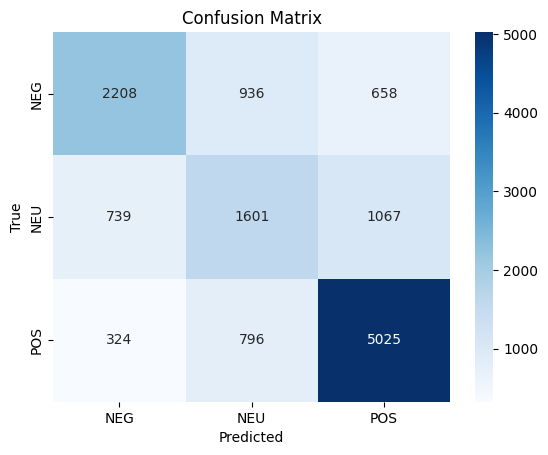

In [43]:
cm = confusion_matrix(y_true, y_pred, labels=["NEG", "NEU", "POS"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["NEG", "NEU", "POS"],
            yticklabels=["NEG", "NEU", "POS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
